In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "../data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [4]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [5]:
# Fit the model
history = model.fit(
    X_train, y_train_90d, epochs=1000, batch_size=256,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6877 - acc: 0.5257 - val_loss: 0.6859 - val_acc: 0.5639
Epoch 2/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6804 - acc: 0.6096 - val_loss: 0.6838 - val_acc: 0.5824
Epoch 3/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6775 - acc: 0.6115 - val_loss: 0.6827 - val_acc: 0.5858
Epoch 4/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6754 - acc: 0.6102 - val_loss: 0.6817 - val_acc: 0.5800
Epoch 5/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6736 - acc: 0.6094 - val_loss: 0.6809 - val_acc: 0.5779
Epoch 6/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6719 - acc: 0.6092 - val_loss: 0.6801 - val_acc: 0.5714
Epoch 7/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6704 - acc: 0.6096 - val_loss: 0.6793 - 

27584/27584 [==============================] - 0s 7us/step - loss: 0.6238 - acc: 0.6526 - val_loss: 0.6516 - val_acc: 0.6136
Epoch 60/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6236 - acc: 0.6529 - val_loss: 0.6521 - val_acc: 0.6114
Epoch 61/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6232 - acc: 0.6532 - val_loss: 0.6516 - val_acc: 0.6120
Epoch 62/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6229 - acc: 0.6535 - val_loss: 0.6518 - val_acc: 0.6119
Epoch 63/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6226 - acc: 0.6534 - val_loss: 0.6509 - val_acc: 0.6132
Epoch 64/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6224 - acc: 0.6544 - val_loss: 0.6510 - val_acc: 0.6116
Epoch 65/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6221 - acc: 0.6535 - val_loss: 0.6508 - val_acc: 0.6120
Epoch 66/1000
27584/27584 [==============

Epoch 118/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6143 - acc: 0.6544 - val_loss: 0.6449 - val_acc: 0.6169
Epoch 119/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6142 - acc: 0.6553 - val_loss: 0.6448 - val_acc: 0.6175
Epoch 120/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6142 - acc: 0.6561 - val_loss: 0.6451 - val_acc: 0.6159
Epoch 121/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6141 - acc: 0.6562 - val_loss: 0.6452 - val_acc: 0.6164
Epoch 122/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6140 - acc: 0.6562 - val_loss: 0.6447 - val_acc: 0.6178
Epoch 123/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6140 - acc: 0.6558 - val_loss: 0.6450 - val_acc: 0.6169
Epoch 124/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6139 - acc: 0.6558 - val_loss: 0.6446 - val_acc: 0.6175
Epoch 125/1000
27584

27584/27584 [==============================] - 0s 6us/step - loss: 0.6124 - acc: 0.6560 - val_loss: 0.6461 - val_acc: 0.6171
Epoch 177/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6123 - acc: 0.6560 - val_loss: 0.6458 - val_acc: 0.6166
Epoch 178/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6123 - acc: 0.6563 - val_loss: 0.6460 - val_acc: 0.6161
Epoch 179/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6123 - acc: 0.6560 - val_loss: 0.6463 - val_acc: 0.6149
Epoch 180/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6123 - acc: 0.6568 - val_loss: 0.6459 - val_acc: 0.6169
Epoch 181/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6123 - acc: 0.6561 - val_loss: 0.6458 - val_acc: 0.6164
Epoch 182/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6122 - acc: 0.6568 - val_loss: 0.6456 - val_acc: 0.6193
Epoch 183/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 6us/step - loss: 0.6118 - acc: 0.6561 - val_loss: 0.6473 - val_acc: 0.6166
Epoch 235/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6118 - acc: 0.6567 - val_loss: 0.6473 - val_acc: 0.6178
Epoch 236/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6118 - acc: 0.6555 - val_loss: 0.6473 - val_acc: 0.6169
Epoch 237/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6119 - acc: 0.6559 - val_loss: 0.6471 - val_acc: 0.6179
Epoch 238/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6118 - acc: 0.6560 - val_loss: 0.6470 - val_acc: 0.6187
Epoch 239/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6118 - acc: 0.6561 - val_loss: 0.6472 - val_acc: 0.6179
Epoch 240/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6118 - acc: 0.6565 - val_loss: 0.6472 - val_acc: 0.6179
Epoch 241/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 6us/step - loss: 0.6116 - acc: 0.6563 - val_loss: 0.6478 - val_acc: 0.6166
Epoch 293/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6115 - acc: 0.6564 - val_loss: 0.6478 - val_acc: 0.6145
Epoch 294/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6115 - acc: 0.6567 - val_loss: 0.6483 - val_acc: 0.6165
Epoch 295/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6116 - acc: 0.6560 - val_loss: 0.6482 - val_acc: 0.6151
Epoch 296/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6115 - acc: 0.6568 - val_loss: 0.6478 - val_acc: 0.6159
Epoch 297/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6116 - acc: 0.6563 - val_loss: 0.6480 - val_acc: 0.6168
Epoch 298/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6115 - acc: 0.6561 - val_loss: 0.6478 - val_acc: 0.6152
Epoch 299/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 6us/step - loss: 0.6113 - acc: 0.6561 - val_loss: 0.6484 - val_acc: 0.6149
Epoch 351/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6113 - acc: 0.6572 - val_loss: 0.6483 - val_acc: 0.6078
Epoch 352/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6113 - acc: 0.6565 - val_loss: 0.6484 - val_acc: 0.6069
Epoch 353/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6113 - acc: 0.6565 - val_loss: 0.6483 - val_acc: 0.6130
Epoch 354/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6112 - acc: 0.6557 - val_loss: 0.6489 - val_acc: 0.6145
Epoch 355/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6113 - acc: 0.6570 - val_loss: 0.6484 - val_acc: 0.6137
Epoch 356/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6113 - acc: 0.6570 - val_loss: 0.6484 - val_acc: 0.6143
Epoch 357/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 7us/step - loss: 0.6110 - acc: 0.6558 - val_loss: 0.6489 - val_acc: 0.6130
Epoch 409/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6110 - acc: 0.6563 - val_loss: 0.6489 - val_acc: 0.6137
Epoch 410/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6111 - acc: 0.6569 - val_loss: 0.6487 - val_acc: 0.6137
Epoch 411/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6110 - acc: 0.6566 - val_loss: 0.6487 - val_acc: 0.6087
Epoch 412/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6110 - acc: 0.6568 - val_loss: 0.6492 - val_acc: 0.6140
Epoch 413/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6110 - acc: 0.6563 - val_loss: 0.6488 - val_acc: 0.6111
Epoch 414/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6110 - acc: 0.6565 - val_loss: 0.6488 - val_acc: 0.6133
Epoch 415/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 6us/step - loss: 0.6108 - acc: 0.6572 - val_loss: 0.6490 - val_acc: 0.6032
Epoch 467/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6108 - acc: 0.6575 - val_loss: 0.6491 - val_acc: 0.6140
Epoch 468/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6108 - acc: 0.6573 - val_loss: 0.6496 - val_acc: 0.6122
Epoch 469/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6108 - acc: 0.6569 - val_loss: 0.6496 - val_acc: 0.6122
Epoch 470/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6108 - acc: 0.6578 - val_loss: 0.6492 - val_acc: 0.6136
Epoch 471/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6108 - acc: 0.6573 - val_loss: 0.6491 - val_acc: 0.6090
Epoch 472/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6108 - acc: 0.6568 - val_loss: 0.6494 - val_acc: 0.6132
Epoch 473/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 6us/step - loss: 0.6106 - acc: 0.6576 - val_loss: 0.6495 - val_acc: 0.6145
Epoch 525/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6106 - acc: 0.6571 - val_loss: 0.6495 - val_acc: 0.6103
Epoch 526/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6106 - acc: 0.6573 - val_loss: 0.6495 - val_acc: 0.6103
Epoch 527/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6106 - acc: 0.6567 - val_loss: 0.6496 - val_acc: 0.6139
Epoch 528/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6105 - acc: 0.6565 - val_loss: 0.6495 - val_acc: 0.6016
Epoch 529/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6106 - acc: 0.6573 - val_loss: 0.6496 - val_acc: 0.6140
Epoch 530/1000
27584/27584 [==============================] - 0s 5us/step - loss: 0.6106 - acc: 0.6579 - val_loss: 0.6495 - val_acc: 0.6049
Epoch 531/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 6us/step - loss: 0.6104 - acc: 0.6580 - val_loss: 0.6497 - val_acc: 0.6020
Epoch 583/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6103 - acc: 0.6576 - val_loss: 0.6498 - val_acc: 0.6100
Epoch 584/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6102 - acc: 0.6576 - val_loss: 0.6499 - val_acc: 0.6135
Epoch 585/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6104 - acc: 0.6576 - val_loss: 0.6497 - val_acc: 0.6062
Epoch 586/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6104 - acc: 0.6570 - val_loss: 0.6498 - val_acc: 0.6074
Epoch 587/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6103 - acc: 0.6578 - val_loss: 0.6498 - val_acc: 0.6027
Epoch 588/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6103 - acc: 0.6572 - val_loss: 0.6497 - val_acc: 0.6008
Epoch 589/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 6us/step - loss: 0.6101 - acc: 0.6579 - val_loss: 0.6502 - val_acc: 0.6072
Epoch 641/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6580 - val_loss: 0.6501 - val_acc: 0.6019
Epoch 642/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6101 - acc: 0.6583 - val_loss: 0.6503 - val_acc: 0.6126
Epoch 643/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6582 - val_loss: 0.6501 - val_acc: 0.6027
Epoch 644/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6101 - acc: 0.6587 - val_loss: 0.6503 - val_acc: 0.6130
Epoch 645/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6101 - acc: 0.6580 - val_loss: 0.6501 - val_acc: 0.6066
Epoch 646/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6101 - acc: 0.6578 - val_loss: 0.6501 - val_acc: 0.5997
Epoch 647/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 6us/step - loss: 0.6099 - acc: 0.6584 - val_loss: 0.6505 - val_acc: 0.6027
Epoch 699/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6099 - acc: 0.6589 - val_loss: 0.6504 - val_acc: 0.5981
Epoch 700/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6099 - acc: 0.6576 - val_loss: 0.6504 - val_acc: 0.6006
Epoch 701/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6099 - acc: 0.6586 - val_loss: 0.6505 - val_acc: 0.5978
Epoch 702/1000
27584/27584 [==============================] - ETA: 0s - loss: 0.6093 - acc: 0.658 - ETA: 0s - loss: 0.6099 - acc: 0.657 - 0s 7us/step - loss: 0.6098 - acc: 0.6578 - val_loss: 0.6506 - val_acc: 0.6127
Epoch 703/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6099 - acc: 0.6590 - val_loss: 0.6505 - val_acc: 0.5994
Epoch 704/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6099 - acc: 0.6

27584/27584 [==============================] - 0s 6us/step - loss: 0.6098 - acc: 0.6583 - val_loss: 0.6507 - val_acc: 0.5992
Epoch 756/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6098 - acc: 0.6583 - val_loss: 0.6508 - val_acc: 0.6053
Epoch 757/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6098 - acc: 0.6590 - val_loss: 0.6506 - val_acc: 0.5990
Epoch 758/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6097 - acc: 0.6587 - val_loss: 0.6507 - val_acc: 0.6008
Epoch 759/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6097 - acc: 0.6584 - val_loss: 0.6507 - val_acc: 0.5997
Epoch 760/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6098 - acc: 0.6575 - val_loss: 0.6507 - val_acc: 0.5994
Epoch 761/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6098 - acc: 0.6584 - val_loss: 0.6507 - val_acc: 0.6004
Epoch 762/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 7us/step - loss: 0.6096 - acc: 0.6591 - val_loss: 0.6511 - val_acc: 0.5991
Epoch 814/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6096 - acc: 0.6586 - val_loss: 0.6512 - val_acc: 0.6006
Epoch 815/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6096 - acc: 0.6594 - val_loss: 0.6510 - val_acc: 0.6001
Epoch 816/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6095 - acc: 0.6591 - val_loss: 0.6511 - val_acc: 0.6000
Epoch 817/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6095 - acc: 0.6580 - val_loss: 0.6511 - val_acc: 0.5988
Epoch 818/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6096 - acc: 0.6587 - val_loss: 0.6511 - val_acc: 0.6003
Epoch 819/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6096 - acc: 0.6582 - val_loss: 0.6510 - val_acc: 0.6003
Epoch 820/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 9us/step - loss: 0.6094 - acc: 0.6585 - val_loss: 0.6514 - val_acc: 0.5988
Epoch 872/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6094 - acc: 0.6589 - val_loss: 0.6515 - val_acc: 0.5982
Epoch 873/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6094 - acc: 0.6588 - val_loss: 0.6514 - val_acc: 0.6008
Epoch 874/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6094 - acc: 0.6586 - val_loss: 0.6514 - val_acc: 0.6003
Epoch 875/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6094 - acc: 0.6587 - val_loss: 0.6514 - val_acc: 0.6003
Epoch 876/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6093 - acc: 0.6590 - val_loss: 0.6519 - val_acc: 0.5974
Epoch 877/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6094 - acc: 0.6589 - val_loss: 0.6514 - val_acc: 0.6001
Epoch 878/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 5us/step - loss: 0.6092 - acc: 0.6592 - val_loss: 0.6516 - val_acc: 0.5992
Epoch 930/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6093 - acc: 0.6587 - val_loss: 0.6516 - val_acc: 0.5997
Epoch 931/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6093 - acc: 0.6592 - val_loss: 0.6516 - val_acc: 0.6001
Epoch 932/1000
27584/27584 [==============================] - 0s 7us/step - loss: 0.6092 - acc: 0.6590 - val_loss: 0.6516 - val_acc: 0.5997
Epoch 933/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6093 - acc: 0.6589 - val_loss: 0.6517 - val_acc: 0.6004
Epoch 934/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6093 - acc: 0.6592 - val_loss: 0.6518 - val_acc: 0.6013
Epoch 935/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6092 - acc: 0.6604 - val_loss: 0.6522 - val_acc: 0.5974
Epoch 936/1000
27584/27584 [=====

27584/27584 [==============================] - 0s 6us/step - loss: 0.6090 - acc: 0.6588 - val_loss: 0.6520 - val_acc: 0.5997
Epoch 988/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6091 - acc: 0.6590 - val_loss: 0.6520 - val_acc: 0.6007
Epoch 989/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6092 - acc: 0.6587 - val_loss: 0.6521 - val_acc: 0.5987
Epoch 990/1000
27584/27584 [==============================] - 0s 6us/step - loss: 0.6091 - acc: 0.6598 - val_loss: 0.6520 - val_acc: 0.6003
Epoch 991/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6091 - acc: 0.6590 - val_loss: 0.6521 - val_acc: 0.6053
Epoch 992/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6092 - acc: 0.6589 - val_loss: 0.6525 - val_acc: 0.5975
Epoch 993/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6092 - acc: 0.6584 - val_loss: 0.6519 - val_acc: 0.5994
Epoch 994/1000
27584/27584 [======

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A93AAD2B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A93B368400>]], dtype=object)

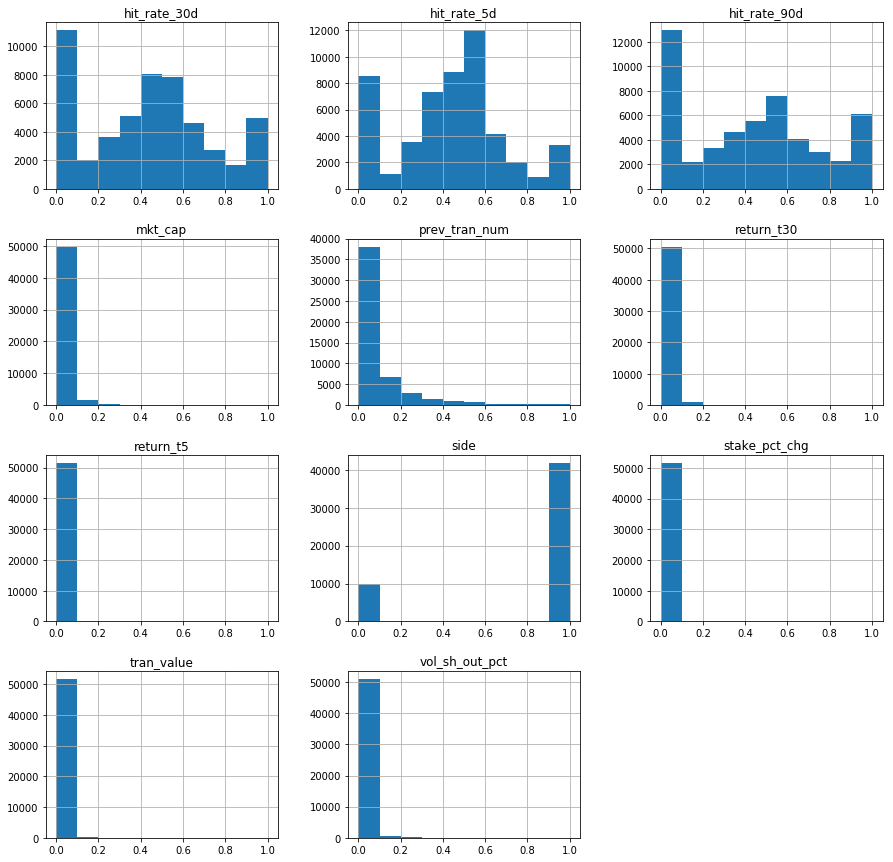

In [6]:
df[col_list].hist(figsize = [15,15])

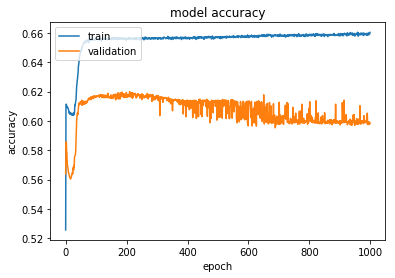

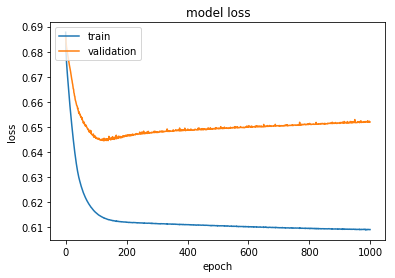

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
# evaluate the model
scores = model.evaluate(X_train, y_train_90d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_90d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 24us/step
[Train] acc: 64.69%
17240/17240 [==============================] - 0s 22us/step
[Test] acc: 63.05%
